# Task C - 2D Non-Linear Regression 

In [331]:
import torch 
import torch.nn as nn 

import pandas as pd 
import matplotlib.pyplot as plt 

In [332]:
data = pd.read_csv('data/day_head_circumference.csv').values

In [333]:
x_train = torch.tensor(data[:, 0], dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).reshape(-1, 1)

In [334]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        o = nn.Sigmoid()
        return 20 * o(x * self.linear.weight + self.linear.bias) + 31

In [335]:
model = Model(1, 1)

In [336]:
learning_rate = 0.0001
epochs = 8000

In [337]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [338]:
loss = 0 
losses = []

In [339]:
 for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1

## Loss graph

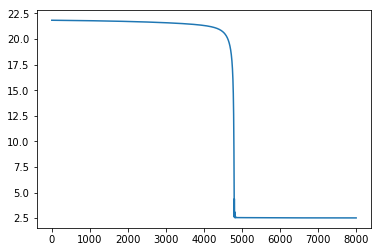

In [340]:
plt.plot(range(epochs), losses)

## Optimization result

In [341]:
W = model.linear.weight.item()
b = model.linear.bias.item()

print(f'W: {W}, b: {b}, loss: {loss}')

W: 0.0031202025711536407, b: -0.24810965359210968, loss: 2.523597478866577


## Optimization graph

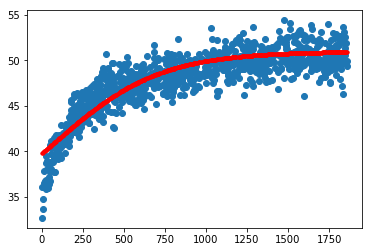

In [342]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.forward(x_train).detach(), 'r.')